In [1]:
#importing dependices
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#using pandas to read the database stored in same folder
data = pd.read_csv('marscrater_pds.csv',low_memory = False)
print(len(data))             # Number of observations (rows)
print(len(data.columns))     # Number of variables (columns)

384343
10


In [3]:
#Upper case all DataFrame column names
data.columns = map(str.upper,data.columns)

In [4]:
#Bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

In [5]:
#Type of each column
data.dtypes

CRATER_ID                  object
CRATER_NAME                object
LATITUDE_CIRCLE_IMAGE     float64
LONGITUDE_CIRCLE_IMAGE    float64
DIAM_CIRCLE_IMAGE         float64
DEPTH_RIMFLOOR_TOPOG      float64
MORPHOLOGY_EJECTA_1        object
MORPHOLOGY_EJECTA_2        object
MORPHOLOGY_EJECTA_3        object
NUMBER_LAYERS               int64
dtype: object

In [6]:
# freqeuncy disributions using the 'groupby' function
print("Counts for \"NUMBER_LAYERS\" variable...")
nl = data.groupby("NUMBER_LAYERS").size()                       #counts
print(nl)
print('\n')
print("Percentages for \"NUMBER_LAYERS\" variable...")
nlp = data.groupby("NUMBER_LAYERS").size() * 100 / len(data)   #precentages
print(nlp)

Counts for "NUMBER_LAYERS" variable...
NUMBER_LAYERS
0    364612
1     15467
2      3435
3       739
4        85
5         5
dtype: int64


Percentages for "NUMBER_LAYERS" variable...
NUMBER_LAYERS
0   94.866304
1    4.024270
2    0.893733
3    0.192276
4    0.022116
5    0.001301
dtype: float64


In [7]:
# using value counts function to generate frequency distributions for depth of craters variable
print("Counts for \"DEPTH_RIMFLOOR_TOPOG\" variable...")
drt = data["DEPTH_RIMFLOOR_TOPOG"].value_counts(sort = False)                       #counts
print(drt)
print('\n')
print("Percentage for \"DEPTH_RIMFLOOR_TOPOG\" variable...")
drtp = data["DEPTH_RIMFLOOR_TOPOG"].value_counts(sort = False, normalize = True)    #percentages
print(drtp)

Counts for "DEPTH_RIMFLOOR_TOPOG" variable...
0.000000    307529
2.000000        14
0.220000      1189
0.190000      1363
0.430000       684
             ...  
0.780000       302
0.620000       446
0.160000      1541
1.570000        44
1.140000        99
Name: DEPTH_RIMFLOOR_TOPOG, Length: 296, dtype: int64


Percentage for "DEPTH_RIMFLOOR_TOPOG" variable...
0.000000   0.800142
2.000000   0.000036
0.220000   0.003094
0.190000   0.003546
0.430000   0.001780
             ...   
0.780000   0.000786
0.620000   0.001160
0.160000   0.004009
1.570000   0.000114
1.140000   0.000258
Name: DEPTH_RIMFLOOR_TOPOG, Length: 296, dtype: float64


In [8]:
# using value counts function to generate frequency distributions
print("Counts for \"DIAM_CIRCLE_IMAGE\" variable...")
dci = data["DIAM_CIRCLE_IMAGE"].value_counts(sort = False)                      #counts
print(dci)
print('\n')
print("Percentages for \"DIAM_CIRCLE_IMAGE\" variable...")
dcip = data["DIAM_CIRCLE_IMAGE"].value_counts(sort = False,normalize = True)    #precentages
print(dcip)

Counts for "DIAM_CIRCLE_IMAGE" variable...
8.000000       46
2.000000      915
14.080000      17
24.430000       6
3.040000      284
             ... 
27.820000       5
291.590000      1
31.960000       1
31.600000       5
23.810000       5
Name: DIAM_CIRCLE_IMAGE, Length: 6240, dtype: int64


Percentages for "DIAM_CIRCLE_IMAGE" variable...
8.000000     0.000120
2.000000     0.002381
14.080000    0.000044
24.430000    0.000016
3.040000     0.000739
               ...   
27.820000    0.000013
291.590000   0.000003
31.960000    0.000003
31.600000    0.000013
23.810000    0.000013
Name: DIAM_CIRCLE_IMAGE, Length: 6240, dtype: float64


In [9]:
#describing NUMBER_LAYERS variable
des1 = data["NUMBER_LAYERS"].describe()
print(des1)

count   384343.000000
mean         0.064835
std          0.304889
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: NUMBER_LAYERS, dtype: float64


In [10]:
#describing DEPTH_RIMFLOOR_TOPOG variable
des2 = data["DEPTH_RIMFLOOR_TOPOG"].describe()
print(des2)

count   384343.000000
mean         0.075838
std          0.221518
min         -0.420000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.950000
Name: DEPTH_RIMFLOOR_TOPOG, dtype: float64


In [11]:
#describing DIAM_CIRCLE_IMAGE variable
des3 = data["DIAM_CIRCLE_IMAGE"].describe()
print(des3)

count   384343.000000
mean         3.556686
std          8.591993
min          1.000000
25%          1.180000
50%          1.530000
75%          2.550000
max       1164.220000
Name: DIAM_CIRCLE_IMAGE, dtype: float64


Text(0.5, 0, 'Number of layers')

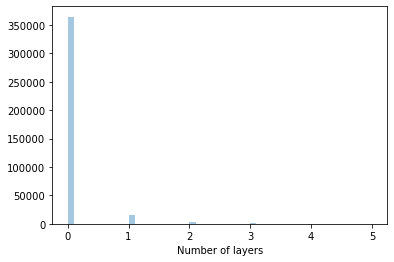

In [12]:
#Univariate graph for "NUMBER_LAYERS" variable
sns.distplot(data["NUMBER_LAYERS"].dropna(),kde = False)
plt.xlabel('Number of layers')

Text(0.5, 0, 'Depth of crater')

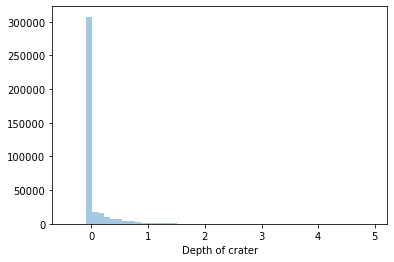

In [13]:
#Univariate graph for "DEPTH_RIMFLOOR_TOPOG" variable
sns.distplot(data['DEPTH_RIMFLOOR_TOPOG'].dropna(),kde = False)
plt.xlabel('Depth of crater')

Text(0.5, 0, 'Diameter of crater')

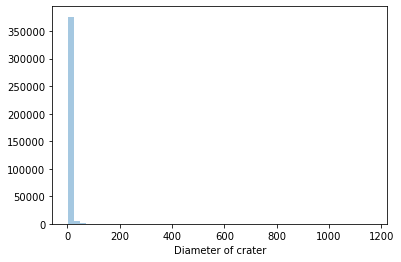

In [14]:
#Univariate graph for "DIAM_CIRCLE_IMAGE" variable
sns.distplot(data['DIAM_CIRCLE_IMAGE'].dropna(),kde = False)
plt.xlabel('Diameter of crater')

AxesSubplot(0.125,0.125;0.775x0.755)


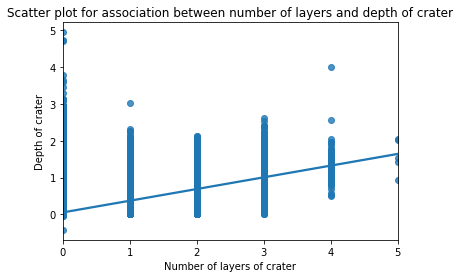

In [15]:
#Scatter plot to understand the relationship between NUMBER_LAYERS and DEPTH_RIMFLOOR_TOPOG
p1 = sns.regplot(x = 'NUMBER_LAYERS',y = 'DEPTH_RIMFLOOR_TOPOG',data = data)
plt.xlabel('Number of layers of crater')
plt.ylabel('Depth of crater')
plt.title('Scatter plot for association between number of layers and depth of crater')
print(p1)

AxesSubplot(0.125,0.125;0.775x0.755)


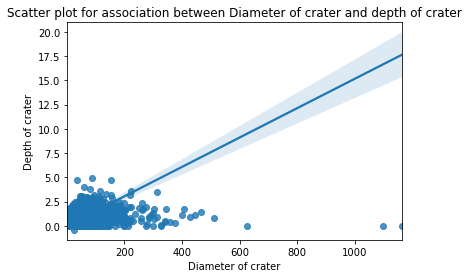

In [16]:
#Scatter plot to understand the relationship between DIAM_CIRCLE_IMAGE and DEPTH_RIMFLOOR_TOPOG
p2 = sns.regplot(x = 'DIAM_CIRCLE_IMAGE',y = 'DEPTH_RIMFLOOR_TOPOG',data = data)
plt.xlabel('Diameter of crater')
plt.ylabel('Depth of crater')
plt.title('Scatter plot for association between Diameter of crater and depth of crater')
print(p2)

AxesSubplot(0.125,0.125;0.775x0.755)


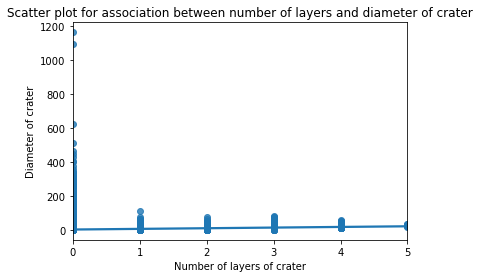

In [17]:
#Scatter plot to understand the relationship between NUMBER_LAYERS and DIAM_CIRCLE_IMAGE
p3 = sns.regplot(x = 'NUMBER_LAYERS',y = 'DIAM_CIRCLE_IMAGE',data = data)
plt.xlabel('Number of layers of crater')
plt.ylabel('Diameter of crater')
plt.title('Scatter plot for association between number of layers and diameter of crater')
print(p3)